# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [28]:
import main
import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%load_ext memory_profiler

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, z rzadkimi macierzami prostokątnymi. Czyli dana jest macierz $\mathbf{A}$ prostokątna o wymiarach ($m\times n$) i [rzadka](https://pl.wikipedia.org/wiki/Macierz_rzadka) oraz wektor $\mathbf{b}$ ($m\times 1$), należy rozwiązać układ równań postaci:    
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Dane jest $m = 50$ oraz $n = 12$. Zdefiniuję funkcję *spare_matrixAbt*, która zwróci:
- wektor $\mathbf{t}$ typu $m\times 1$ za pomocą komendy linspace tak aby wartości tego wektora należay do przedzaiłu $[0,1]$,
- wektor $\mathbf{b}$ typu $m \times 1$, którego wartości dane są funkcją $\cos(4t)$ oraz
- macierz $\mathbf{A}$ postaci: 
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
$$  
  
**Wskazówka**: Do definicji macierzy $\mathbf{A}$ należy użyć funkcji [vander](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vander.html) oraz [fliplr](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.fliplr.html).  
 
  
Rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
\left[\begin{matrix}
x_0\\
x_1\\
x_2\\
\vdots\\
x_{n-1}
\end{matrix}\right] =
\left[\begin{matrix}
b_0\\
b_1\\
b_2\\
\vdots\\
b_{m-1}
\end{matrix}\right]
$$ 
za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci: $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ (zdefinuj funkcję *square_from_rectan* która przekształci odpowiednio macierz A i wektor b)  i stosując funkcję solve, z poprzednich zajęć.
2. Domyślnej metody Pythona rozwiązywania układów równań z macierzą prostokątną [lstsq](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html#numpy-linalg-lstsq).  
3. Rozkładu QR rozwiązywania układów równań podanego na wykładzie. Do dokonania rozkładu QR w Pythonie używa się funkcji [qr](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.qr.html), natomiast do rozwiązywania układu równań z macierzą trójkątną służy funkcja [solve_triangular](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html)
4. Metody rozkładu SVD rozwiązywania układów równań podanego na wykładzie.
5. Porównaj czasy wykonania wszystkich metod oraz zużycie pamięci.
6. Porównaj jakość otrzymanych wyników

In [2]:
A, b = main.spare_matrix_Abt(50, 12)

Metoda 1

In [40]:
A_new, b_new = main.square_from_rectan(A, b)
x_1 = np.linalg.solve(A_new, b_new)
res_norm = main.residual_norm(A_new, x_1, b_new)

print("Norma: ", res_norm)
%memit np.linalg.solve(A_new, b_new)

Norma:  3.952643448111926e-14
peak memory: 112.18 MiB, increment: 0.00 MiB


In [41]:
%%timeit -n 10 -r10

A_new, b_new = main.square_from_rectan(A, b)
x_1 = np.linalg.solve(A_new, b_new)
res_norm = main.residual_norm(A_new, x_1, b_new)

The slowest run took 4.42 times longer than the fastest. This could mean that an intermediate result is being cached.
48.2 µs ± 26.2 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


Metoda 2

In [42]:
x_2 = np.linalg.lstsq(A, b, rcond=None)[0]

res_norm = main.residual_norm(A, x_2, b)

print("Norma: ", res_norm)
%memit np.linalg.lstsq(A, b, rcond=None)[0]

Norma:  7.999154460696845e-09
peak memory: 112.18 MiB, increment: 0.00 MiB


In [43]:
%%timeit -n 10 -r10
x_2 = np.linalg.lstsq(A, b, rcond=None)[0]
res_norm = main.residual_norm(A, x_2, b)

95.8 µs ± 8.77 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


Metoda 3

In [44]:
Q,R = np.linalg.qr(A)
x_3 = sp.linalg.solve_triangular(R, Q.T @ b)

res_norm = main.residual_norm(R, x_3, Q.T @ b)

print("Norma: ", res_norm)
%memit sp.linalg.solve_triangular(R, Q.T @ b)

Norma:  6.713543741055863e-16
peak memory: 112.18 MiB, increment: 0.00 MiB


In [12]:
%%timeit -n 10 -r10

Q,R = np.linalg.qr(A)
x_3 = sp.linalg.solve_triangular(R, Q.T @ b)

res_norm = main.residual_norm(R, x_3, Q.T @ b)

202 µs ± 81.8 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


Metoda 4

In [45]:
U,S,V = np.linalg.svd(A, full_matrices=False)
S = np.diag(S)
x_4= V.T @ np.linalg.solve(S, U.T @ b)

res_norm = main.residual_norm(A, x_4, b)

print("Norma: ", res_norm)
%memit V.T @ np.linalg.solve(S, U.T @ b)

Norma:  7.999154669774044e-09
peak memory: 112.18 MiB, increment: 0.00 MiB


In [14]:
%%timeit -n 10 -r10

U,S,V = np.linalg.svd(A, full_matrices=False)
S = np.diag(S)
x_4= V.T @ np.linalg.solve(S, U.T @ b)

res_norm = main.residual_norm(A, x_4, b)

134 µs ± 46.8 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


Najlepiej pod względem dokładności wypada rozkłał QR, niewiele gorsza pod tym względem jest pierwsza metoda z przekształceniem macierzy. Jeśli wezmiemy także pod uwagę czas wykonania, to zdecydowanie
sprowadzenie macierzy A do macierzy kwadratowej jest nawet kilkukrotnie szybsze od innych metod. Jednak wiemy, że ta metoda nie zawsze zapewnia poprawne wyniki. Dlatego moim zdaniem najlepszą opcją jest rozkład QR

***Zadanie 2***  

1. Przy użyciu funkcji [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj dwa wektory $\mathbf{x}_1$ oraz $\mathbf{x}_2$ o wymiarze (100,1) o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

2. Na podstawie uzyskanych wektorów wylicz wartości wektora $y$ danego wzorem:
$$
    y=2+x1-0.5x2+\epsilon
$$
gdzie $\epsilon$ jest wektorem wartości losowtch o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

3. Przy pomocy funkcji [concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) połącz wektor samych jedynek o wymiarze (100,1) z:

- $x_1$,
- $x_2$,
- $x_1$ i $x_2$

z parametrem *axis = 1*.

4. Na podstawie macierzy z punktu 3 oblicz współczynniki [regresji liniowych](https://pl.wikipedia.org/wiki/Regresja_liniowa) z wykorzystaniem rozkładu QR, opisanych zależnościami:

    1. $y\sim a+x_1$
    2. $y\sim a+x_2$
    3. $y\sim a+x_1+x_2$
    4. $y\sim a+x_2+x_2$

5. Przedstaw otrzymane wyniki na odpowiednich subplotach.

In [56]:
#1
x1 = np.random.normal(loc=0, scale=1.0, size=(100,1))
x2 = np.random.normal(loc=0, scale=1.0, size=(100,1))
#2
eps = np.random.normal(loc=0, scale=1.0, size=(100,1))
y = 2+x1-0.5*x2+eps
#3
eye = np.ones((100,1))

x1_eye = np.concatenate((eye, x1), axis=1)
x2_eye = np.concatenate((eye, x2), axis=1)
x12_eye = np.concatenate((eye,x1,x2), axis=1)
pred1=[min(x1), max(x1)]
pred2=[min(x2), max(x2)]

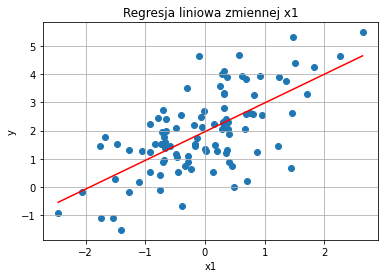

In [57]:
#1.

q, r = np.linalg.qr(x1_eye)
coeff = sp.linalg.solve_triangular(r, q.T @ y)
pred1=[min(x1), max(x1)]
y_approx = coeff[0] + coeff[1] * pred1

plt.scatter(x1,y)
plt.plot(pred1,y_approx, "r")
plt.grid()
plt.title("Regresja liniowa zmiennej x1")
plt.xlabel("x1")
plt.ylabel("y")
plt.show()

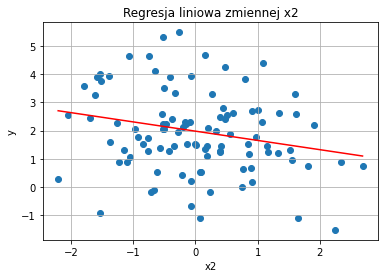

In [58]:
#2.

q, r = np.linalg.qr(x2_eye)
coeff = sp.linalg.solve_triangular(r, q.T @ y)
pred2=[min(x2), max(x2)]
y_approx = coeff[0] + coeff[1] * pred1

plt.scatter(x2,y)
plt.plot(pred2,y_approx, "r")
plt.grid()
plt.title("Regresja liniowa zmiennej x2")
plt.xlabel("x2")
plt.ylabel("y")
plt.show()

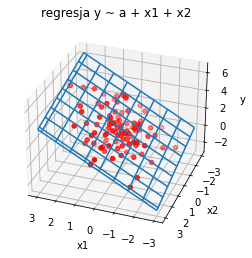

In [60]:
#3.

q, r = np.linalg.qr(x12_eye)
coeff = sp.linalg.solve_triangular(r, q.T @ y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = x1
Y = x2
Z = y

ax.scatter(X, Y, Z, c='r', marker="o")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.title("regresja y ~ a + x1 + x2")

X, Y = np.meshgrid(np.linspace(-3,3,100), np.linspace(-3,3,100))
Z = coeff[0] + coeff[1] * X + coeff[2] * Y
ax.plot_wireframe(X, Y, Z, rstride = 12, cstride = 12)

ax.view_init(30,110)

plt.show()

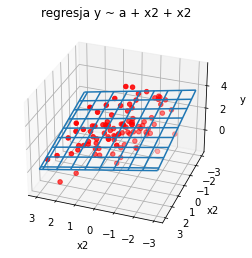

In [61]:
#4.

q, r = np.linalg.qr(x2_eye)
coeff = sp.linalg.solve_triangular(r, q.T @ y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = x2
Y = x2
Z = y

ax.scatter(X, Y, Z, c='r', marker="o")
ax.set_xlabel("x2")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.title("regresja y ~ a + x2 + x2")

X, Y = np.meshgrid(np.linspace(-3,3,100), np.linspace(-3,3,100))
Z = coeff[0] + coeff[1] * X + coeff[1] * Y
ax.plot_wireframe(X, Y, Z, rstride = 12, cstride = 12)

ax.view_init(30,110)

plt.show()

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)